In [1]:
import networkx as nx
import numpy as np
import scipy.spatial as spt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Data loading

In [2]:
G = nx.read_gml('data/pivot_graph.gml', destringizer=nx.readwrite.gml.literal_destringizer)

## Degree distribution

In [3]:
def plotDegreeDist(G, log_scale=True):
    plt.figure(figsize=(14,5))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    plt.subplot(121)
    plt.hist(nx.degree_histogram(G), color='m')
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes')
    plt.title('Degree distribution linear scale')
    
    if log_scale:
        plt.subplot(122)    
        plt.loglog(nx.degree_histogram(G), 'mo-')
        plt.xlabel('Degree')
        plt.ylabel('Number of nodes')
        plt.title('Degree distribution log scale')

    plt.show()

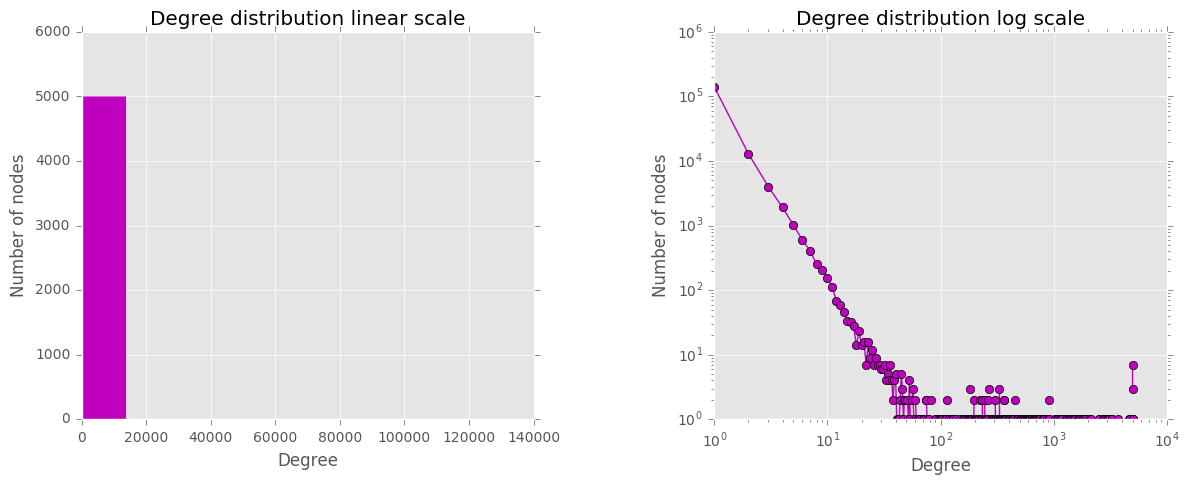

In [4]:
plotDegreeDist(G)

## Preprocessing

In [5]:
%time
num_cores = nx.core_number(G)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 13.8 µs


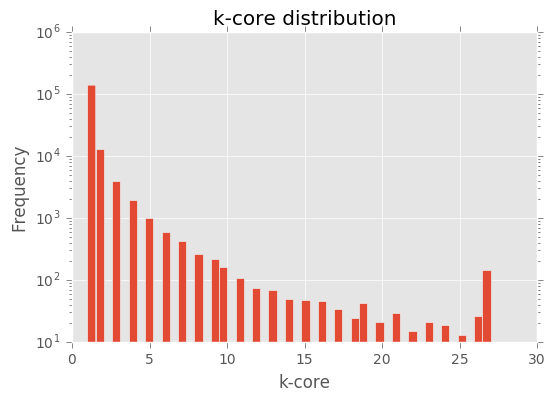

In [6]:
plt.hist(num_cores.values(), bins=np.linspace(min(num_cores.values()), max(num_cores.values())), log=True)
#plt.hist(num_cores.values(), bins=10, log=True)
plt.title('k-core distribution')
plt.xlabel('k-core')
plt.ylabel('Frequency')
plt.show()

In [7]:
# based on k-core distribution chart profile is useful to pick out core of 22th degree
core22 = nx.k_core(G,22)

## Basic structure measures

In [8]:
%time
N, K = core22.order(), core22.size()
avg_deg = float(K) / N
print "Nodes: ", N
print "Edges: ", K
print "Average degree: ", avg_deg
print 'Average shortest path length: ', nx.average_shortest_path_length(core22)
print 'Average clustering: ', nx.average_clustering(core22)
print 'Transitivity: ', nx.transitivity(core22)
print "Density: ", nx.density(core22)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.06 µs
Nodes:  239
Edges:  5433
Average degree:  22.7322175732
Average shortest path length:  1.81220772828
Average clustering:  0.274970331241
Transitivity:  0.226771340268
Density:  0.19102703843


## Distance Measures

In [9]:
print 'Diameter: ', nx.diameter(core22)  # the length of the "longest shortest path"
#print 'Eccentricity: ', nx.eccentricity(core22) # the maximum distance from some node to all other nodes
print 'Radius: ', nx.radius(core22) # the minimum eccentricity
 
center = nx.center(core22) # the set of nodes where eccentricity is minimal i.e. equal to radius 
periphery = nx.periphery(core22) # the set of nodes with eccentricity equal to the diameter
core22.order() == (len(center) + len(periphery))

Diameter:  3
Radius:  2


True

## Core subgraph degree distribution

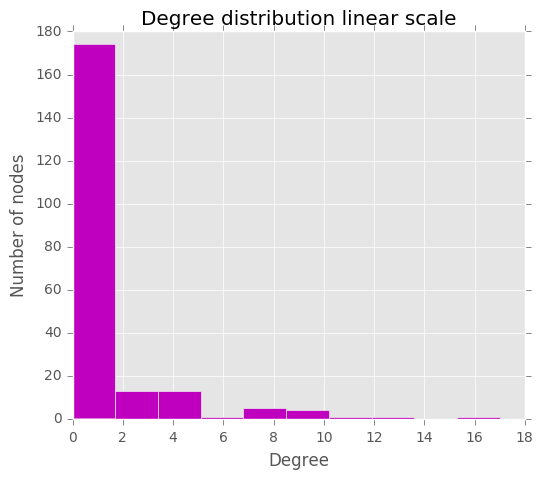

In [10]:
plotDegreeDist(core22, log_scale=False)

## The shortest path length distribution

In [11]:
def shortestPathDist(G, log=True):
    pathlengths = []
    for v in G.nodes():
        spl=nx.single_source_shortest_path_length(G,v)
        for p in spl.values():
            pathlengths.append(p)

    plt.hist(pathlengths, color='m', log=log)
    plt.ylabel('Freqency')
    plt.xlabel('length')
    plt.show()

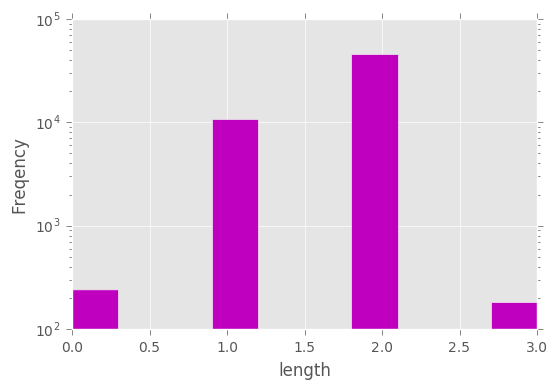

In [12]:
shortestPathDist(core22)

## Centrality metrics

In [13]:
# centrality metrics calculation
dc = nx.degree(core22)
cc = nx.closeness_centrality(core22)
bc = nx.betweenness_centrality(core22)
ec = nx.eigenvector_centrality(core22)

In [14]:
def comparisonChart(metrics, labels, chart_instance=plt.scatter, rows=2, cols=3):
    if len(metrics) != len(labels):
        raise ValueError('metrics and labels must be the same length')
    
    from itertools import combinations
    
    # cоединяем названия с показателями в кортеж
    draft = tuple(zip(labels, metrics))
    # получаем попарные сочетания показателей
    comb = list(combinations(draft, 2))
    
    # рассчет числа столбцов(максимум 4) и строк
    if len(metrics) < 3:
        cols = len(metrics)
    else:
        cols = 3
        
    rows = int(np.ceil(cols/3+0.5))
    
    #общие настройки графика
    plt.figure(figsize=(14,4 * rows))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    for i in range(0, len(comb)):
        plt.subplot(rows, cols, i+1)
        plt.xlabel(comb[i][0][0])
        plt.ylabel(comb[i][1][0])
        chart_instance(comb[i][0][1].values(), comb[i][1][1].values())

    plt.show()

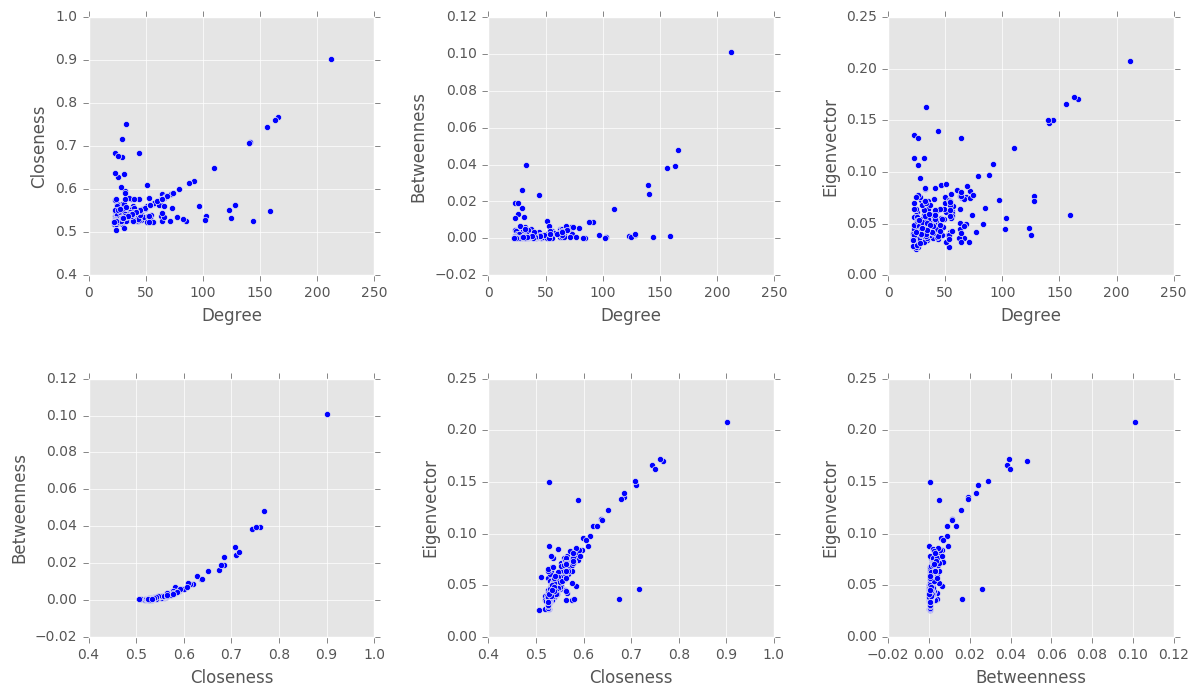

In [15]:
comparisonChart([dc, cc, bc, ec], labels=['Degree', 'Closeness', 'Betweenness', 'Eigenvector'])

### Compare centrality metrics

In [16]:
def centralityDist(metrics, log=True, labels=None):
    if labels != None and len(metrics) != len(labels):
        raise ValueError('metrics and labels must be the same length')

    cols = len(metrics)
    rows = int(np.floor(cols/4+0.5))

    plt.figure(figsize=(16,4))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    for i in range(0, len(metrics)):
        plt.subplot(rows, cols, i+1)
        plt.xlabel(labels[i])
        plt.hist(metrics[i].values(), log=log)

    plt.show()

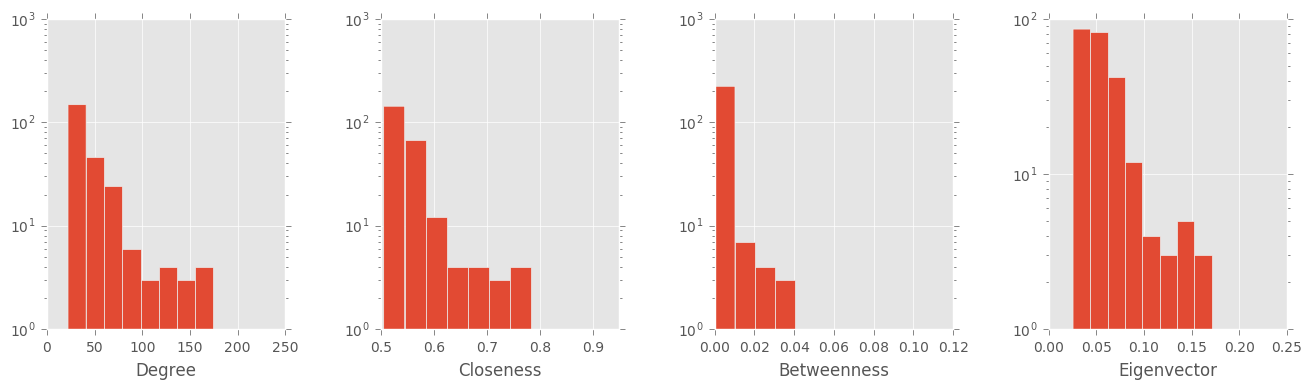

In [17]:
centralityDist([dc, cc, bc, ec], log=True, labels=['Degree', 'Closeness', 'Betweenness', 'Eigenvector'])

In [18]:
def get_top_keys(dictionary, top):
    items = dictionary.items()
    items.sort(reverse=True, key=lambda x: x[1])
    return map(lambda x: x[0], items[:top])

[core22.node[i] for i in get_top_keys(bc,10)]

[{u'name': u'Diana', u'surname': u'Chuyko'},
 {u'name': u'Darya', u'surname': u'Antipova'},
 {u'name': u'Yulia', u'surname': u'Reznik'},
 {u'name': u'Elena', u'surname': u'Anischenko'},
 {u'name': u'Azza', u'surname': u'Slavyansk'},
 {u'name': u'Yulenka', u'surname': u'Mitina'},
 {u'name': u'Alexandra', u'surname': u'Romanova'},
 {u'name': u'Stasya', u'surname': u'Petrenko'},
 {u'name': u'Evgenia', u'surname': u'Shemyakina'},
 {u'name': u'Inna', u'surname': u'Redkozubova'}]

## Cliques

In [19]:
max_clique_size = nx.graph_clique_number(core22)
print 'clique number: ', nx.graph_number_of_cliques(core22) 
print 'largest clique size: ', max_clique_size

clique number:  7786
largest clique size:  12


In [20]:
max_clique_nodes = list(nx.k_clique_communities(G, max_clique_size))
print 'Largest clique components:'
[core22.node[i] for i in max_clique_nodes[0]]

Largest clique components:


[{u'name': u'Karina', u'surname': u'Belous'},
 {u'name': u'Veronika', u'surname': u'Nikitina'},
 {u'name': u'Marishka', u'surname': u'Makarova'},
 {u'name': u'Azza', u'surname': u'Slavyansk'},
 {u'name': u'Darya', u'surname': u'Antipova'},
 {u'name': u'Darya', u'surname': u'Gladkaya'},
 {u'name': u'Svetlana', u'surname': u'Snegireva-Cherkashina'},
 {u'name': u'Stasya', u'surname': u'Petrenko'},
 {u'name': u'Yulenka', u'surname': u'Mitina'},
 {u'name': u'Anastasia', u'surname': u'Kozhevnikova'},
 {u'name': u'Yulia', u'surname': u'Reznik'},
 {u'name': u'Elena', u'surname': u'Anischenko'},
 {u'name': u'Diana', u'surname': u'Chuyko'},
 {u'name': u'Anna', u'surname': u'Vaskovych'},
 {u'name': u'Alexandra', u'surname': u'Romanova'},
 {u'name': u'Inna', u'surname': u'Redkozubova'}]

## Community detection

In [21]:
def plotMatrix(A):
    
    f, ax = plt.subplots(2, 2, figsize=(10,10))
    ax[0, 0].imshow(A, cmap = 'Greys', interpolation = 'None')
    ax[0, 0].set_title('Adjacency Matrix')
    
    D = np.corrcoef(A)
    ax[1, 0].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[1, 0].set_title('Correlation coeff.')
    
    dVec = spt.distance.pdist(A, metric = 'euclidean')
    D = spt.distance.squareform(dVec)
    ax[0, 1].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[0, 1].set_title('Euclidean Dist.')
    
    dVec = spt.distance.pdist(A, metric = 'cosine')
    D = spt.distance.squareform(dVec)
    ax[1, 1].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[1, 1].set_title('Cosine Dist.')

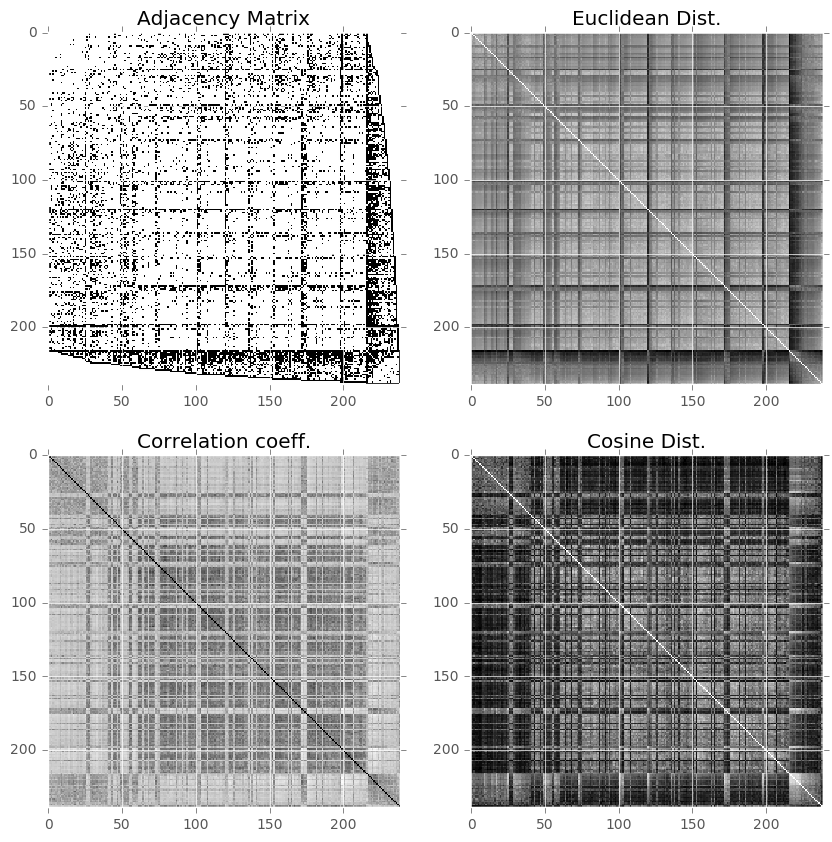

In [22]:
l = list(nx.utils.reverse_cuthill_mckee_ordering(core22))
A = nx.to_numpy_matrix(core22, nodelist=l)

plotMatrix(A)

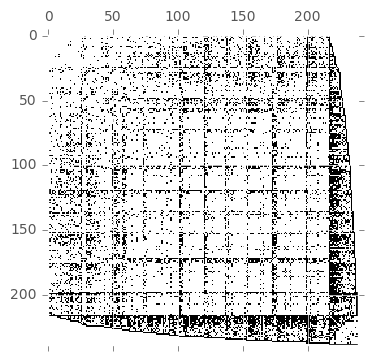

In [23]:
plt.spy(A)